In [1]:
pwd

'C:\\Users\\Henry\\Comparative study'

## This study is aimed at investigating the effect of neglecting exogenous features in time series modeling.

## It also attempt to compare prediction accuracy of classical time series model with Recurrent neural network

## All prizes are in USA dollars


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use("seaborn")
import seaborn as sns
sns.set()

In [3]:
# importing the data to used for time series 
data_1 = pd.read_csv('case_1.csv')
data_1.head(5)

,Date,PRIZE
0,Oct-1973,7.46
1,Nov-1973,9.01
2,Dec-1973,10.71
3,Jan-1974,13.67
4,Feb-1974,13.96


In [4]:
data_1.tail(5)

,Date,PRIZE
557,Nov-2020,NaN
558,Dec-2020,53.81
559,Jan-2021,NaN
560,Feb-2021,NaN
561,NaN,NaN


In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    561 non-null    object 
 1   PRIZE   512 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [6]:
data_1.isna().sum()

Date      1
PRIZE    50
dtype: int64

In [7]:
data_1 = data_1.dropna()
data_1.head(10)

,Date,PRIZE
0,Oct-1973,7.46
1,Nov-1973,9.01
2,Dec-1973,10.71
3,Jan-1974,13.67
4,Feb-1974,13.96
5,Mar-1974,14.36
6,Apr-1974,14.20
7,May-1974,14.02
8,Jun-1974,13.93
9,Jul-1974,12.87


In [8]:
data_1.isna().sum()

Date     0
PRIZE    0
dtype: int64

In [9]:
# convert columns to integers
data_1.columns.values

array(['Date', 'PRIZE'], dtype=object)

In [10]:
cols_1 = ['PRIZE']

In [11]:
for columns in cols_1:
    data_1[columns] = data_1[columns].astype(int)

In [12]:
data_1.head(10)

,Date,PRIZE
0,Oct-1973,7
1,Nov-1973,9
2,Dec-1973,10
3,Jan-1974,13
4,Feb-1974,13
5,Mar-1974,14
6,Apr-1974,14
7,May-1974,14
8,Jun-1974,13
9,Jul-1974,12


In [13]:
# import datetime
from datetime import datetime

data_1.Date = pd.to_datetime(data_1.Date,dayfirst=True)
data_1.head(5)

,Date,PRIZE
0,1973-10-01,7
1,1973-11-01,9
2,1973-12-01,10
3,1974-01-01,13
4,1974-02-01,13


In [14]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 0 to 558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    512 non-null    datetime64[ns]
 1   PRIZE   512 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 10.0 KB


In [15]:
data_1.set_index('Date',inplace = True)

In [16]:
data_1.head(5)

,PRIZE
Date,
1973-10-01,7
1973-11-01,9
1973-12-01,10
1974-01-01,13
1974-02-01,13


In [17]:
data_1.shape

(512, 1)

In [18]:
# save a copy of th data to be used for RNN

data_rnn = data_1.copy()

# The line plot will be used to view the Crude oil prize over this past years

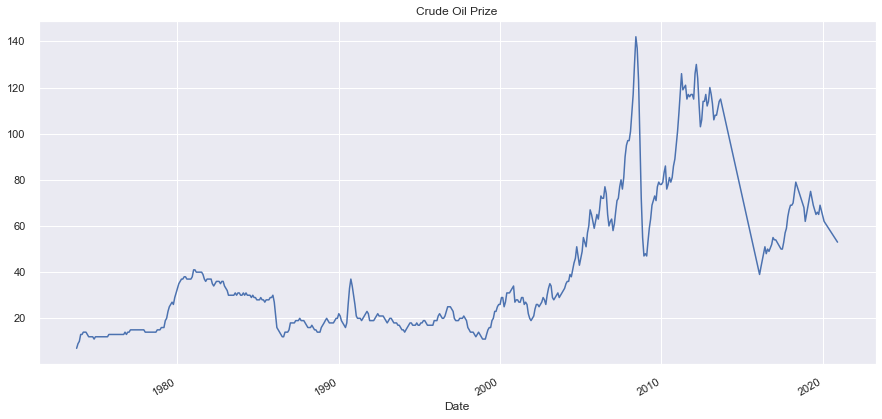

In [19]:
data_1.PRIZE.plot(figsize=(15,7), title = "Crude Oil Prize")
plt.show()

In [20]:
# set the frequency
# M representing data was only collected on monthly basics
data_new =data_1.asfreq('MS')

In [21]:
data_new.isna().sum()

PRIZE    55
dtype: int64

In [22]:
data_new = data_new.fillna(value=data_1.mean())

In [23]:
data_new.isna().sum()

PRIZE    0
dtype: int64

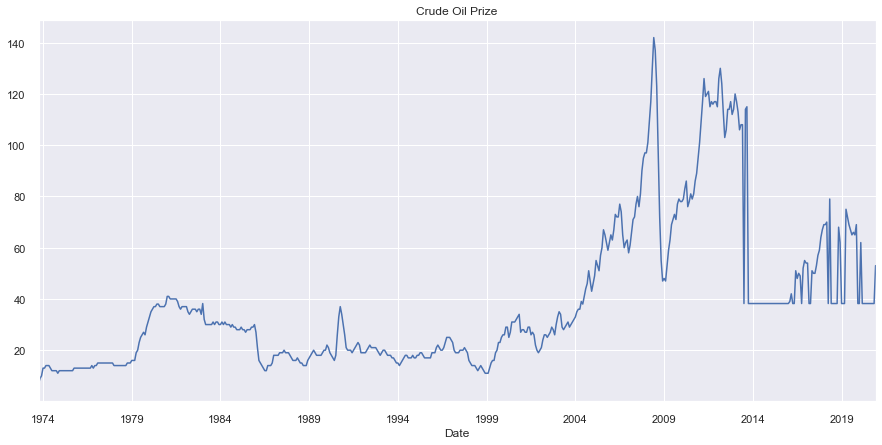

In [24]:
data_new.PRIZE.plot(figsize=(15,7), title = "Crude Oil Prize")
plt.show()

In [25]:
data_new.head(5)

,PRIZE
Date,
1973-10-01,7.0
1973-11-01,9.0
1973-12-01,10.0
1974-01-01,13.0
1974-02-01,13.0


# inspect the data to test for stationarity ie using the  equation method


# Every indication from plot shows that the time series is not stationaries but this will be supported using The DICKEY - FULLER TEST
## In order to interprete the statistics , we will observe the assumption made by :

## If test Statisics is < Critical value = Stationarity
## the p_value must also be statistically significant ie < 0.05


In [26]:
import statsmodels.tsa.stattools as sts 

sts.adfuller(data_new.PRIZE)

(-2.4477389652231594,
 0.128713084768605,
 3,
 563,
 {'1%': -3.4420185006698127,
  '5%': -2.8666873299250253,
  '10%': -2.5695113665058726},
 3732.692583797599)

# the result shows that data_new.PRIZE is not stationarized ie p_value is >0.05

# further effort will be made to inspect if seasonal non-stationality is observed using the Naive method

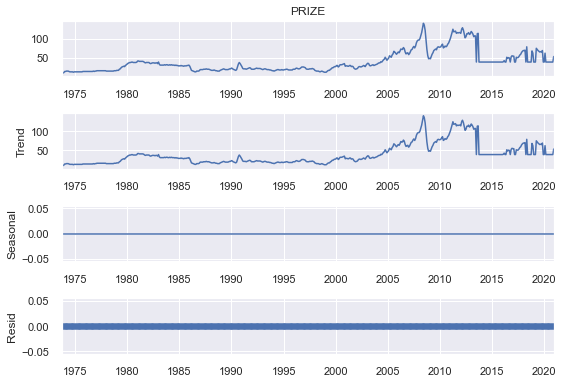

<Figure size 2880x1296 with 0 Axes>

In [27]:
# To Test for Seasonality using Naive method  ie Additive and Multiplicative

from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose_additive_PRIZE= seasonal_decompose( data_new.PRIZE,model="additive", period=1)
seasonal_decompose_additive_PRIZE.plot()
plt.figure(figsize=(40,18))
plt.show()

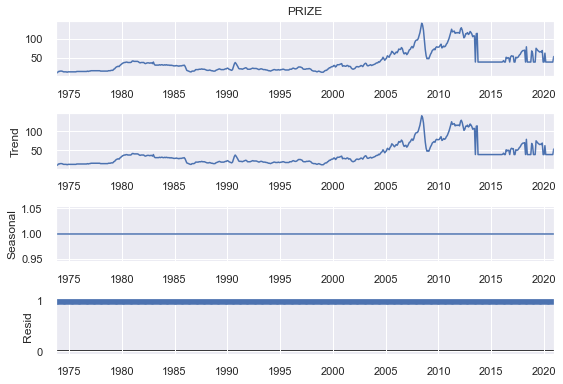

<Figure size 2880x720 with 0 Axes>

In [28]:
# To Test for Seasonality using Naive method   Multiplicative
seasonal_decompose_multiplicative_PRIZE_multiplicative= seasonal_decompose(data_new.PRIZE,model="multiplicative", period=1)
seasonal_decompose_multiplicative_PRIZE_multiplicative.plot()
plt.figure(figsize=(40,10))
plt.show()

# data_new.PRIZE is not a seasonal non-stationalized data and so normal ARIMA method can easily be employed after making the data stationarired

# TO make the data to be stationarized using the differencing approach

In [29]:

data_new['int_PRIZE'] = data_new.PRIZE.diff(1)

In [30]:
data_new.head(5)

,PRIZE,int_PRIZE
Date,,
1973-10-01,7.0,NaN
1973-11-01,9.0,2.0
1973-12-01,10.0,1.0
1974-01-01,13.0,3.0
1974-02-01,13.0,0.0


In [31]:
data_new.int_PRIZE[np.isnan(data_new.int_PRIZE)] = 0
data_new.int_PRIZE[np.isinf(data_new.int_PRIZE)] = 0

sts.adfuller(data_new.int_PRIZE)

(-14.575968516493935,
 4.54850442161778e-27,
 2,
 564,
 {'1%': -3.4419977165341673,
  '5%': -2.866678179017994,
  '10%': -2.5695064902419396},
 3736.7363102456256)

# Using differencing approach has stationarized the data as test statistics is now less than the critical condition ie -14.5759 is less than 1%,5% and 10% results 

# Secondly the pvalue is now less than 0.05

In [32]:
data_new = data_new.iloc[1:]
data_new.head(5)

,PRIZE,int_PRIZE
Date,,
1973-11-01,9.0,2.0
1973-12-01,10.0,1.0
1974-01-01,13.0,3.0
1974-02-01,13.0,0.0
1974-03-01,14.0,1.0


# Plot of the stationarieised crude oil prize

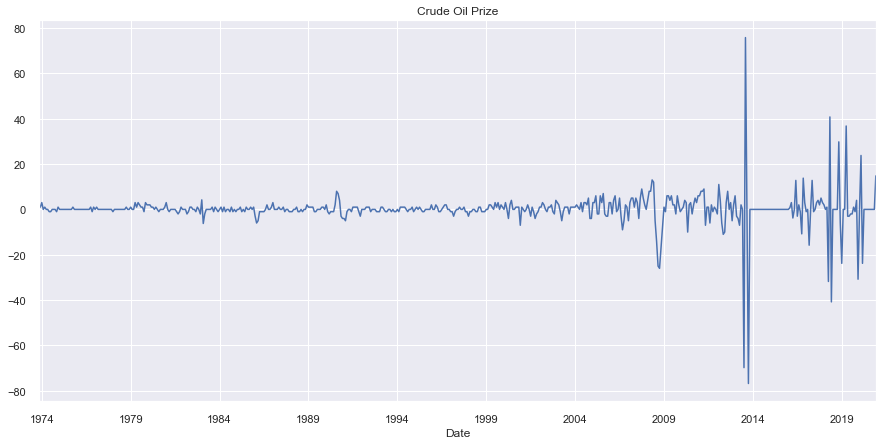

In [33]:
data_new.int_PRIZE.plot(figsize=(15,7), title = "Crude Oil Prize")
plt.show()

# Now to select best model that defines the series
# Next will be to select best ARIMA Model that fits the series, We are going to follow the rules to confirm if ARIMA is satisfied
# And use Auto_ARIMA TO Select each best lag

# AR = ACF (Spikes decay towards zero)  &  PACF (Spike cut off to zero)
# MA= PACF (Spikes decay towards zero)  &  ACF (Spike cut off to zero)
# ARIMA = PACF (Spikes decay towards zero) & ACF (Spikes decay towards zero)

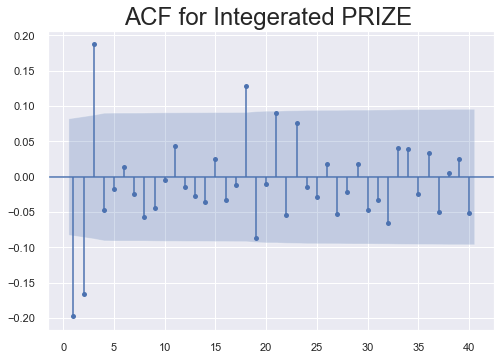

In [34]:
## ACF and PACF 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(data_new.int_PRIZE, zero = False, lags = 40)
plt.title("ACF for Integerated PRIZE ", size=24)
plt.show()

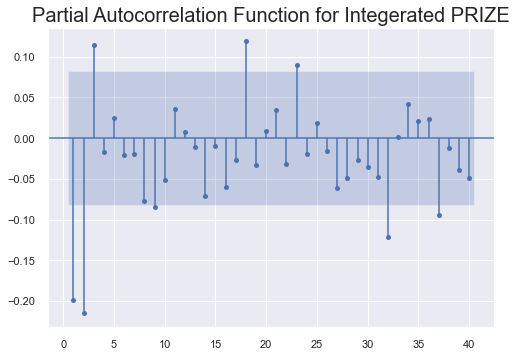

In [35]:
sgt.plot_pacf(data_new.int_PRIZE, lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("Partial Autocorrelation Function for Integerated PRIZE",size=20)
plt.show()

# both ACF and PACF Shows same pattern indicating data is now stationarized and that ARIMA MODEL is situable

## Next will be t0 use the auto arima approach in selecting best lap time

In [36]:
from pmdarima.arima import auto_arima  
from pmdarima.arima import OCSBTest 

# I am going to be using the Akaike information criterion(AIC) as a matrix to compare the performance of various ARIMA based models

In [37]:
 model_returns_PRIZE  = auto_arima (data_new.int_PRIZE,start_p = 0, start_q = 0,max_p =5, max_q = 5, seasonal= False,trace = True )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3898.232, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3877.569, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3867.865, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3867.887, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3864.220, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3853.205, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3849.519, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3847.652, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3853.119, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=3849.417, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3847.686, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.38 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3849.543, Time=0.18 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 1.302 seconds


# The suitable  lag time for PRIZE ie (ARIMA(2,0,1)) decision based on the AIC Approach

In [38]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [39]:
from statsmodels.tsa.arima_model import ARIMA
# Models for PRIZE

model_int_PRIZE = ARIMA(data_new.int_PRIZE, order=(2,0,1))
results_int_PRIZE = model_int_PRIZE.fit()

C:\Users\Henry\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [40]:
data_new.shape

(566, 2)

In [41]:
# Now am gonna divide the data into train and test

nobs =20
train,test =data_new[0:-nobs],data_new[-nobs: ]

In [42]:
train.shape,test.shape

((546, 2), (20, 2))

In [43]:
train.tail(3)

,PRIZE,int_PRIZE
Date,,
2019-02-01,38.208984,0.000000
2019-03-01,38.208984,0.000000
2019-04-01,75.000000,36.791016


In [44]:
test.head(3)

,PRIZE,int_PRIZE
Date,,
2019-05-01,72.0,-3.0
2019-06-01,69.0,-3.0
2019-07-01,67.0,-2.0


In [45]:
# for difference of price

Start_int_prize = len(train.int_PRIZE)
end_int_prize = len(train.int_PRIZE) + len(test.int_PRIZE)-1

<AxesSubplot:xlabel='Date'>

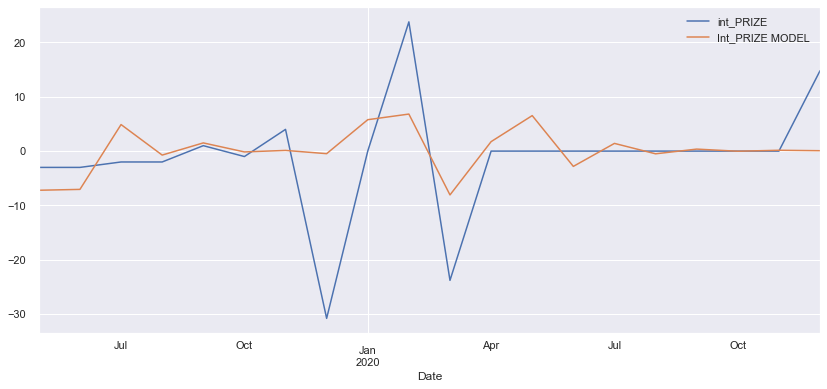

In [46]:
predictions_int_prize = results_int_PRIZE.predict(Start_int_prize,end_int_prize).rename('Int_PRIZE MODEL')
test.int_PRIZE.plot(legend=True,figsize =(14,6))
predictions_int_prize.plot(legend=True)

In [47]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt


print(np.sqrt(mean_squared_error(test.int_PRIZE,predictions_int_prize)))

9.643209963192819


In [48]:
predictions_int_prize.head(10)

Date
2019-05-01   -7.206545
2019-06-01   -7.047114
2019-07-01    4.887047
2019-08-01   -0.731734
2019-09-01    1.510555
2019-10-01   -0.150690
2019-11-01    0.126936
2019-12-01   -0.471962
2020-01-01    5.782190
2020-02-01    6.817829
Freq: MS, Name: Int_PRIZE MODEL, dtype: float64

In [49]:
test.int_PRIZE.head(10)

Date
2019-05-01    -3.000000
2019-06-01    -3.000000
2019-07-01    -2.000000
2019-08-01    -2.000000
2019-09-01     1.000000
2019-10-01    -1.000000
2019-11-01     4.000000
2019-12-01   -30.791016
2020-01-01     0.000000
2020-02-01    23.791016
Freq: MS, Name: int_PRIZE, dtype: float64

In [50]:
import numpy as np
from numpy.random import seed 
seed(1) 
import pandas as pd
import tensorflow as tf
!pip install keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import random 

# Setting the seed for numpy-generated random numbers
np.random.seed(1234)

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [51]:
# by default Keras's model.compile() sets the shuffle argument as True. You should the set numpy seed before importing keras. e.g.:

# import numpy as np
# np.random.seed(1337) # for reproducibility

In [52]:
# Data for RNN

data_rnn.head(10)

,PRIZE
Date,
1973-10-01,7
1973-11-01,9
1973-12-01,10
1974-01-01,13
1974-02-01,13
1974-03-01,14
1974-04-01,14
1974-05-01,14
1974-06-01,13


<AxesSubplot:xlabel='Date'>

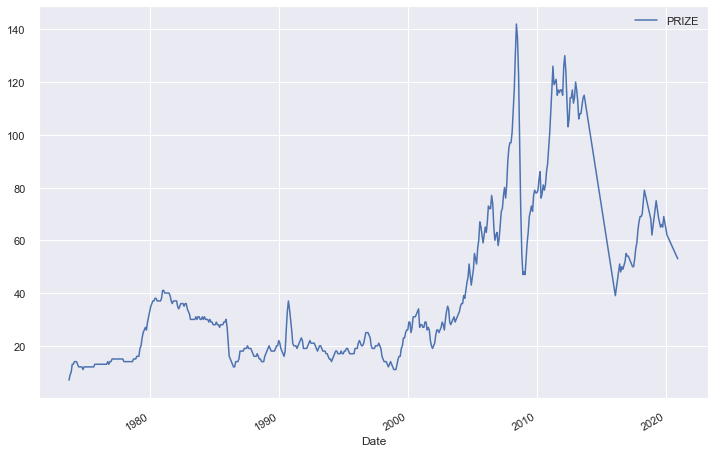

In [53]:
data_rnn.plot(figsize= (12,8))

In [54]:
len(data_rnn)

512

In [55]:
train_len = len(data_rnn)-20

In [56]:
train = data_rnn.iloc[:train_len]
test=data_rnn.iloc[train_len:]

In [57]:
len(test)

20

In [58]:
# TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

# RNN uses weight and bias and so need to be of the same scale. minmaxscaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [59]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET

scaler.fit(train)

MinMaxScaler()

In [60]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [61]:
# Time Series Generator

# TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12.**

from keras.preprocessing.sequence import TimeseriesGenerator

In [62]:
n_input = 12
n_features=1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [63]:
len(scaled_train)

492

In [64]:
len(scaled_test)

20

In [65]:
len(generator)

480

In [66]:
scaled_train

array([[0.        ],
       [0.01481481],
       [0.02222222],
       [0.04444444],
       [0.04444444],
       [0.05185185],
       [0.05185185],
       [0.05185185],
       [0.04444444],
       [0.03703704],
       [0.03703704],
       [0.03703704],
       [0.03703704],
       [0.02962963],
       [0.03703704],
       [0.03703704],
       [0.03703704],
       [0.03703704],
       [0.03703704],
       [0.03703704],
       [0.03703704],
       [0.03703704],
       [0.03703704],
       [0.03703704],
       [0.04444444],
       [0.04444444],
       [0.04444444],
       [0.04444444],
       [0.04444444],
       [0.04444444],
       [0.04444444],
       [0.04444444],
       [0.04444444],
       [0.04444444],
       [0.04444444],
       [0.04444444],
       [0.05185185],
       [0.04444444],
       [0.05185185],
       [0.05185185],
       [0.05925926],
       [0.05925926],
       [0.05925926],
       [0.05925926],
       [0.05925926],
       [0.05925926],
       [0.05925926],
       [0.059

In [67]:
scaled_train[:6]

array([[0.        ],
       [0.01481481],
       [0.02222222],
       [0.04444444],
       [0.04444444],
       [0.05185185]])

In [68]:
x,y = generator[0]

In [69]:
x

array([[[0.        ],
        [0.01481481],
        [0.02222222],
        [0.04444444],
        [0.04444444],
        [0.05185185],
        [0.05185185],
        [0.05185185],
        [0.04444444],
        [0.03703704],
        [0.03703704],
        [0.03703704]]])

In [70]:
y

array([[0.03703704]])

In [71]:
x.shape, y.shape

((1, 12, 1), (1, 1))

In [72]:
# check first 2 of your scaled_train & compare with x, also see if the predicted y is close to corresponding x

In [73]:
### Create the Model

# TASK: Create a Keras Sequential Model with as many LSTAM units you want and a final Dense Layer.**

In [74]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
Early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience=2)

In [75]:
# define model
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               91200     
_________________________________________________________________
dense (Dense)                (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [77]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=n_input, batch_size=1)

In [78]:
# fit model
# multiprocessing=False  in methods like fit_generator
model.fit_generator(generator,callbacks=[Early_stopping],validation_data = validation_generator,epochs=30,shuffle = False)

Epoch 1/30


C:\Users\Henry\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1879: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


480/480 [==============================] - 3s 5ms/step - loss: 0.0013 - val_loss: 0.0058
Epoch 2/30
480/480 [==============================] - 1s 3ms/step - loss: 0.0056 - val_loss: 0.0021
Epoch 3/30
480/480 [==============================] - 1s 3ms/step - loss: 0.0115 - val_loss: 0.0072
Epoch 4/30
480/480 [==============================] - 1s 3ms/step - loss: 0.0054 - val_loss: 0.0012
Epoch 5/30
480/480 [==============================] - 1s 3ms/step - loss: 0.0074 - val_loss: 0.0045
Epoch 6/30
480/480 [==============================] - 1s 3ms/step - loss: 0.0095 - val_loss: 0.0025


In [79]:
# **TASK: Plot the history of the loss that occured during training.**

model.history.history.keys()

dict_keys(['loss', 'val_loss'])

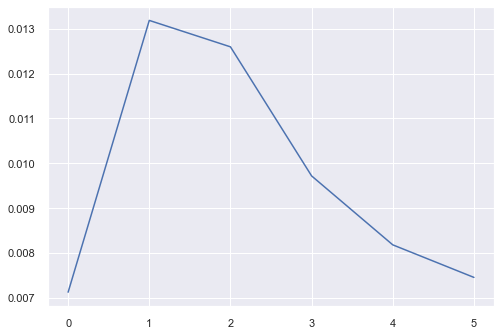

In [80]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [81]:
## Evaluate on Test Data

# TASK: Based on your test data and input size, create an appropriate;y sized "first evaluation batch"

first_eval_batch = scaled_train[-12:]

In [82]:
first_eval_batch = first_eval_batch.reshape((1, 12, n_features))

In [83]:
# **TASK: Generate predictions into the same time stamps as the test set**

test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [84]:
test_predictions

[array([0.41230726], dtype=float32),
 array([0.42956105], dtype=float32),
 array([0.443187], dtype=float32),
 array([0.45358157], dtype=float32),
 array([0.46118915], dtype=float32),
 array([0.46650907], dtype=float32),
 array([0.47007224], dtype=float32),
 array([0.47234672], dtype=float32),
 array([0.47373784], dtype=float32),
 array([0.47456628], dtype=float32),
 array([0.47507674], dtype=float32),
 array([0.4754033], dtype=float32),
 array([0.47561944], dtype=float32),
 array([0.47574568], dtype=float32),
 array([0.47582126], dtype=float32),
 array([0.47586656], dtype=float32),
 array([0.47589374], dtype=float32),
 array([0.47591], dtype=float32),
 array([0.47591978], dtype=float32),
 array([0.4759255], dtype=float32)]

In [85]:
## Inverse Transformations and Compare

## TASK: Inverse Transform your new forecasted predictions.**


true_predictions_new = scaler.inverse_transform(test_predictions)

In [86]:
# IGNORE WARNINGS
test['Predictions'] =true_predictions_new

<ipython-input-86-b21e09998b6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] =true_predictions_new


In [87]:
test.head(12)

,PRIZE,Predictions
Date,,
2017-09-01,57,62.661480
2017-10-01,59,64.990742
2017-11-01,64,66.830245
2017-12-01,67,68.233512
2018-01-01,69,69.260535
2018-02-01,69,69.978725
2018-03-01,70,70.459752
2018-05-01,79,70.766808
2018-11-01,68,70.954608


<AxesSubplot:xlabel='Date'>

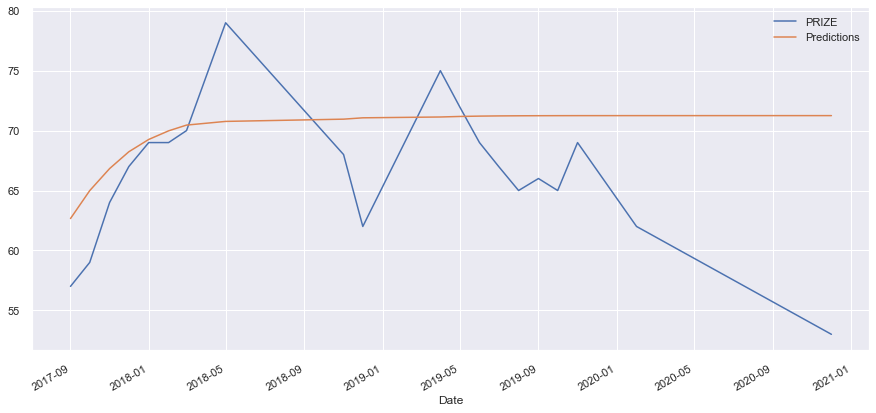

In [88]:
test.plot(figsize=(15,7))

In [89]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

print(np.sqrt(mean_squared_error(test.PRIZE,true_predictions_new)))

6.343508916285851


# to make future forcast

In [90]:
full_scaler = MinMaxScaler()

In [91]:
# forcasting with full data set
scaled_full_data = full_scaler.fit_transform(data_rnn)

In [92]:
n_input = 12

In [93]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=n_input, batch_size=1)

In [94]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [95]:

model.fit_generator(generator,epochs=8,shuffle = False)

Epoch 1/8

C:\Users\Henry\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1879: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '



500/500 [==============================] - 2s 2ms/step - loss: 0.0018
Epoch 2/8
500/500 [==============================] - 1s 2ms/step - loss: 0.0094
Epoch 3/8
500/500 [==============================] - 1s 2ms/step - loss: 0.0103
Epoch 4/8
500/500 [==============================] - 1s 2ms/step - loss: 0.0080
Epoch 5/8
500/500 [==============================] - 1s 2ms/step - loss: 0.0063
Epoch 6/8
500/500 [==============================] - 1s 2ms/step - loss: 0.0048
Epoch 7/8
500/500 [==============================] - 1s 2ms/step - loss: 0.0032
Epoch 8/8
500/500 [==============================] - 1s 2ms/step - loss: 0.0021


In [96]:
# **TASK: Generate predictions into the same time stamps as the test set**

forcast = []

first_eval_batch = scaled_full_data[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forcast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [97]:
forcast

[array([0.36841416], dtype=float32),
 array([0.35827208], dtype=float32),
 array([0.35552397], dtype=float32),
 array([0.35788867], dtype=float32),
 array([0.36364347], dtype=float32),
 array([0.37111938], dtype=float32),
 array([0.37875777], dtype=float32),
 array([0.38547498], dtype=float32),
 array([0.390626], dtype=float32),
 array([0.39420927], dtype=float32),
 array([0.3965823], dtype=float32),
 array([0.39776558], dtype=float32),
 array([0.39768648], dtype=float32),
 array([0.39693844], dtype=float32),
 array([0.39578688], dtype=float32),
 array([0.39448428], dtype=float32),
 array([0.39322373], dtype=float32),
 array([0.3921343], dtype=float32),
 array([0.3912905], dtype=float32),
 array([0.39071772], dtype=float32)]

In [98]:
true_forcast = scaler.inverse_transform(forcast)

In [99]:
true_forcast

array([[56.73591208],
       [55.36673021],
       [54.99573645],
       [55.31497028],
       [56.0918681 ],
       [57.1011163 ],
       [58.1322996 ],
       [59.03912228],
       [59.73451179],
       [60.21825087],
       [60.53861123],
       [60.69835287],
       [60.687675  ],
       [60.58668983],
       [60.431229  ],
       [60.25537801],
       [60.08520392],
       [59.93813169],
       [59.82421559],
       [59.74689153]])

In [100]:
data_rnn.tail(10)

,PRIZE
Date,
2019-04-01,75
2019-05-01,72
2019-06-01,69
2019-07-01,67
2019-08-01,65
2019-09-01,66
2019-10-01,65
2019-11-01,69
2020-02-01,62


In [101]:
# convert z to dataframe
forcast_index = pd.date_range('2020-12-01', periods=20, freq='MS')
forcast_index

DatetimeIndex(['2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
               '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01'],
              dtype='datetime64[ns]', freq='MS')

## Read the forcast crude oil prize below.

In [102]:
true_forcast = pd.DataFrame(data = true_forcast,index =forcast_index,columns = ['forcast'])
true_forcast

,forcast
2020-12-01,56.735912
2021-01-01,55.366730
2021-02-01,54.995736
2021-03-01,55.314970
2021-04-01,56.091868
2021-05-01,57.101116
2021-06-01,58.132300
2021-07-01,59.039122
2021-08-01,59.734512
2021-09-01,60.218251


(594.0, 630.0)

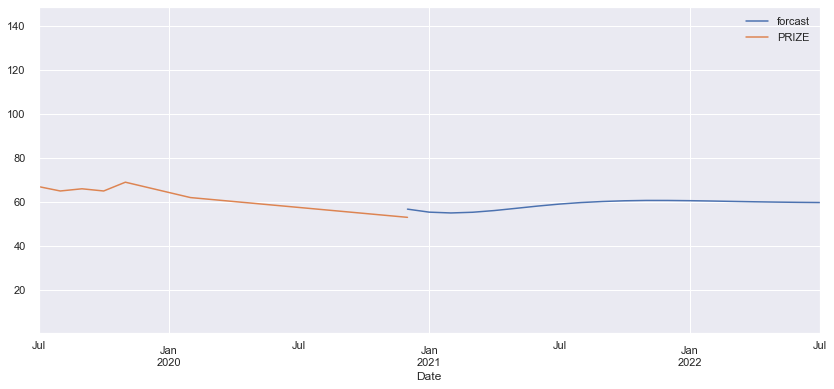

In [104]:
ax =true_forcast.plot(legend=True,figsize =(14,6))
data_rnn.plot(ax = ax)
plt.xlim('2019-07-01','2022-07-01')

## In conclusion, this study has demostrated that deep learning ( RNN) has a more prediction accuracy when compared with the classical method of time series prediction

## I aslo observe that forcasting so long into the future introduces lots of noise into the prediction accuracy. Could this be a limitation or a challenge of using RNN ?

## Thanks

## Henry Nwachukwu.

